In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy 

# Kolmogorov-Smirnov test 
In this notebook we provide the code used for carrying out a Kolmogorov-Smirnov test in for the SBC. 

In [5]:
datapath = '../_BM14/runs'
datasets = os.listdir(datapath)
bfolder_ignore = ['.DS_Store', 'figures']
[datasets.remove(bi) for bi in bfolder_ignore if bi in datasets] 
print(datasets)

['9674556098655156', '18700432274776213', '30429446992157503', '90849722873644648', '41755986115290599', '62997046336084773', '85391614096545007', '21404740432090790', '67855982124208903', '28586596323144229', '58533480461832464', '76224234038895386', '85480232375402055', '58358840425350604', '81687392501552613', '54840232720046073', '68194055844923624', '80210069330650986', '46030474277614981', '80791734420679377', '10398070428630118', '91635330682532182', '51550678282095355', '39632560095419664', '37385460610258721', '14413502938691930', '92471980015705348', '47989456319179394', '88348749514565830', '77894135034492286', '99928736335880867', '84233005379373428', '25471448139883117', '47633459462633850', '47521162963208594', '98897419427499140', '25913534165034601', '50258436239942354', '31649733123904478', '70515420850538573', '33509783100923938', '86725968085599542', '47038153262495700', '38125610668333119', '15525519432459495', '80788646513981273', '24226169555019545', '198429053601

In [6]:
ranks_gtheta = []
ranks_kalpha = []
ranks_paths = []
for dataset in datasets: 
    rank_g = np.genfromtxt(datapath+'/'+dataset+'/_ri_gtheta.csv', delimiter=',')
    ranks_gtheta.append(rank_g)
    rank_k = np.genfromtxt(datapath+'/'+dataset+'/_ri_kalpha.csv', delimiter=',')
    ranks_kalpha.append(rank_k)
    rank_ = np.genfromtxt(datapath+'/'+dataset+'/_ri.csv')
    ranks_paths.append(rank_)
ranks_gtheta = np.array(ranks_gtheta)
ranks_kalpha = np.array(ranks_kalpha)
ranks_paths = np.array(ranks_paths)

In [11]:
ranks_inner = ranks_paths[:,[0, 1, 2, 6],:]
print(ranks_inner.shape)
pvals = []
pvals.append(scipy.stats.kstest(rvs=ranks_gtheta, cdf='uniform', args=(0, 1))[1])
pvals.append(scipy.stats.kstest(rvs=ranks_kalpha, cdf='uniform', args=(0, 1))[1])


(100, 4, 40)


In [12]:
for node in range(ranks_inner.shape[1]):
    for dim in range(ranks_inner.shape[2]):
        pvals.append(scipy.stats.kstest(rvs=ranks_inner[:,node,dim], cdf='uniform', args=(0, 1))[1])

In [13]:
sum(np.array(pvals)<0.01)

np.int64(1)

(array([16., 22., 11., 17., 20., 21., 15., 13., 16., 11.]),
 array([0.0090608 , 0.10441657, 0.19977234, 0.29512811, 0.39048388,
        0.48583965, 0.58119542, 0.67655119, 0.77190696, 0.86726273,
        0.9626185 ]),
 <BarContainer object of 10 artists>)

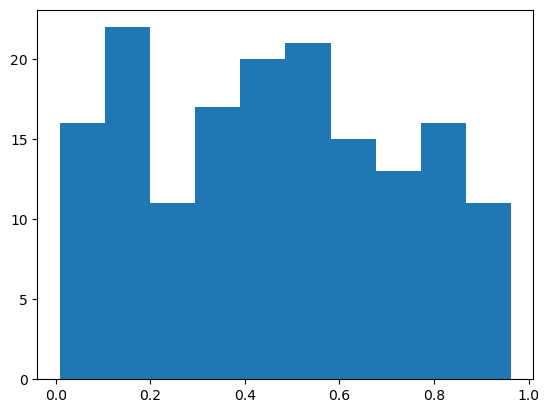

In [14]:
plt.hist(pvals)